# Study in Classifiers Using Iris Dataset

Author: Richard Hackathorn <richardh@bolder.com> License: BSD 3 clause

Content derived from http://scikit-learn.org/ and https://github.com/rasbt/python-machine-learning-book

## Import Iris (or another classification) dataset

        sepal_length  sepal_width  petal_length  petal_width    species
count     150.000000   150.000000    150.000000   150.000000        150
unique           NaN          NaN           NaN          NaN          3
top              NaN          NaN           NaN          NaN  virginica
freq             NaN          NaN           NaN          NaN         50
mean        5.843333     3.057333      3.758000     1.199333        NaN
std         0.828066     0.435866      1.765298     0.762238        NaN
min         4.300000     2.000000      1.000000     0.100000        NaN
25%         5.100000     2.800000      1.600000     0.300000        NaN
50%         5.800000     3.000000      4.350000     1.300000        NaN
75%         6.400000     3.300000      5.100000     1.800000        NaN
max         7.900000     4.400000      6.900000     2.500000        NaN


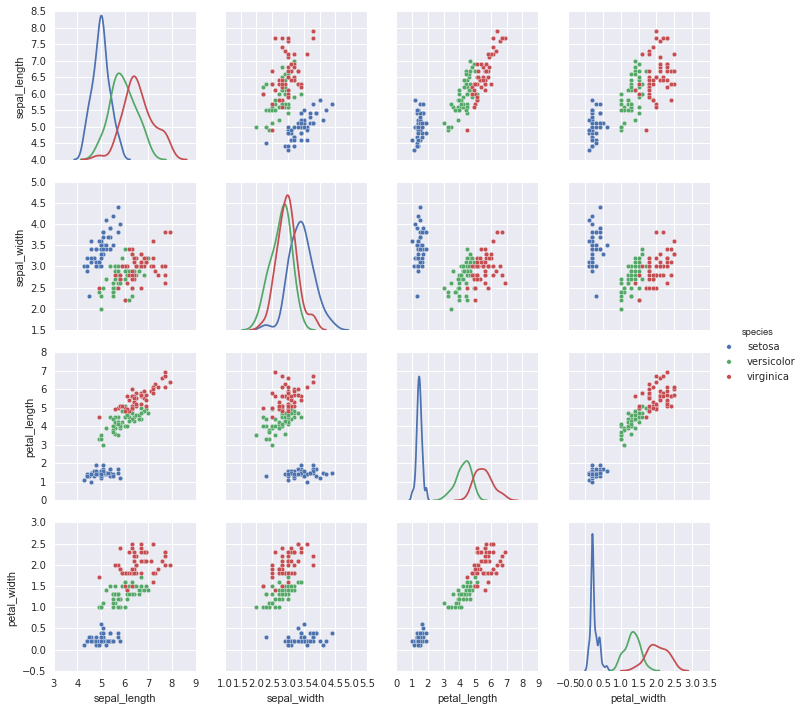

In [27]:
%matplotlib inline
from sklearn.datasets import load_boston, load_iris, load_diabetes, load_digits, load_linnerud
import seaborn as sns
sns.set()

datasetList = [  # function to return dataset object ala sckkitLearn
    load_boston(), #Boston house-prices dataset (regression)
    load_iris(), #Iris dataset (classification)
    load_diabetes(), #Diabetes dataset (regression)
    load_digits(), #Digits dataset (classification)
    load_linnerud() #Linnerud dataset (multivariate regression)
    ]
dataset = datasetList[1]
# print (dir(dataset))

# plot scatterplot matrix
df = sns.load_dataset("iris")
print (df.describe(include = 'all'))
sns.pairplot(df, hue="species", diag_kind="kde")

# set X (features) and y (target)
X, y = dataset.data, dataset.target

# Visualizing the data

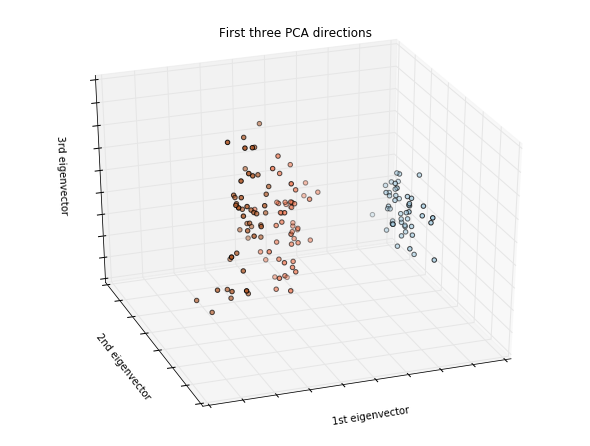

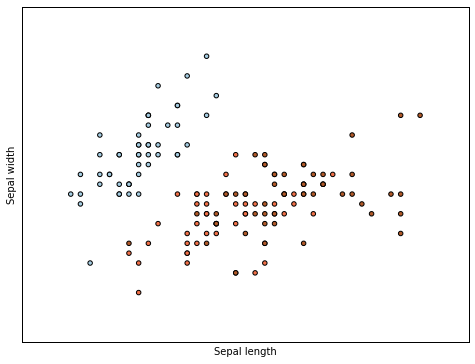

In [6]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Concatenating multiple feature extraction methods

Derived from http://scikit-learn.org/stable/auto_examples/feature_stacker.html

In [7]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# This dataset is way to high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
#grid_search.fit(X, y)
grid_search.fit(X_features, y)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.686275 -   0.0s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.784314 -   0.0s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.729167 -   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.666667 -   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.745098 -   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_s

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.1s finished
